In [ ]:
# Author: Erkan Sahin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [353]:
# Here, we read our data and then explore our features.
diabetes = pd.read_csv('D:\yedek\Projects\Diagnosing Diabetes\diabetes.csv')
print("Features that we will use:")
for feature_number,feature in enumerate(diabetes.columns,1):
    print (feature_number,"-",feature)

Features that we will use:
1 - Pregnancies
2 - Glucose
3 - BloodPressure
4 - SkinThickness
5 - Insulin
6 - BMI
7 - DiabetesPedigreeFunction
8 - Age
9 - Outcome


In [354]:
print("We have",diabetes.shape[0],"examples.")
diabetes.head(n=20)


We have 768 examples.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


This is the frequencies of diabetes vs not diabetes. '1' denotes diabetes.

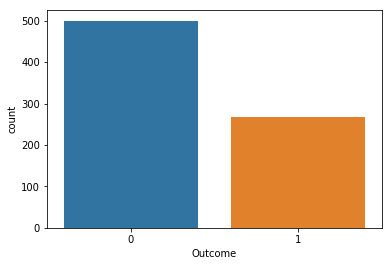

In [355]:
import seaborn as sns
sns.countplot(diabetes['Outcome'])


In [356]:
df=  diabetes.copy()
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())                            


Let's try a bunch of normalizers and stadardizers to fit the data better

In [357]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
#minMaxScaled = MinMaxScaler().fit_transform(df)
robustScaled = RobustScaler().fit_transform(df)
#standardScaled =StandardScaler().fit_transform(df)
#normalized = Normalizer().fit_transform(df)

In order to get 3 principal component of the data to visualize the data better and reducing noise, we apply Principal Component Analysis

In [358]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
minMaxScaled = MinMaxScaler().fit_transform(df)
minMaxScaled = pd.DataFrame(minMaxScaled, columns=df.columns)
X3D = pca.fit_transform(minMaxScaled.loc[:,minMaxScaled.columns!='Outcome'])
#X_train,X_test,Y_train,Y_test = train_test_split(diabetes.loc[:,diabetes.columns!='Outcome'],diabetes['Outcome'],random_state = 66)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
clfNeighbour = KNeighborsClassifier()
clfNaive =  GaussianNB()
clflogistic = LogisticRegression()
clfTree = DecisionTreeClassifier()
clfNetwork = MLPClassifier()
clfSVC = SVC()
#Creating hyperparameters to try on gridSearch
neighbourParams = {'n_neighbors' :[1,3,5,7,9,15],'weights':['uniform','distance'],'leaf_size':[5,10,15,20,25,30,35,40]}
logisticParams = {'penalty':['l1','l2'],'C':[0.1,0.3,0.9,2.7,8.1]}
treeParams = {'criterion':['gini','entropy']}
networkParams = {'alpha':[0.0001,0.0003,0.001,0.003,0.01,0.03,0.1],'learning_rate':['constant', 'invscaling', 'adaptive'],'max_iter':[400]}
SVMparams = {'C':[0.1,0.3,1,3,9,27,54],'kernel':['rbf','linear','poly','sigmoid'],'degree':[2,3,4,5,6],'probability':[True,False]}


It is time to visualize our data

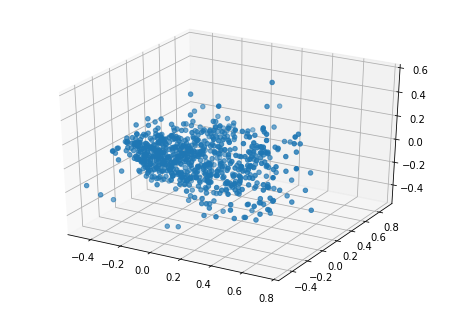

In [359]:
from matplotlib.pyplot import scatter
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X3D[:,0],X3D[:,1], X3D[:,2])
plt.show()

It seems there exists some outliers which may destroy our classifier. Let's clean them!

In [360]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 2.0)
    upper_bound = quartile_3 + (iqr * 2.0)
    return np.where((ys > upper_bound) | (ys < lower_bound))


In [361]:
frame = pd.DataFrame(data=X3D,columns=['Component1','Component2','Component3'])
frame['Labels'] = df['Outcome']
frame = frame.values
frame =np.delete(frame,outliers_iqr(X3D)[0],axis=0)

In [362]:
X3D = frame[:,:3]
X_train,X_test,Y_train,Y_test = train_test_split(X3D,frame[:,3],random_state = 66,test_size = 0.2)
#X_train,X_test,Y_train,Y_test = train_test_split(diabetes.loc[:,diabetes.columns!='Outcome'],diabetes['Outcome'],random_state = 66)

After handling some outliers, our data looks like:

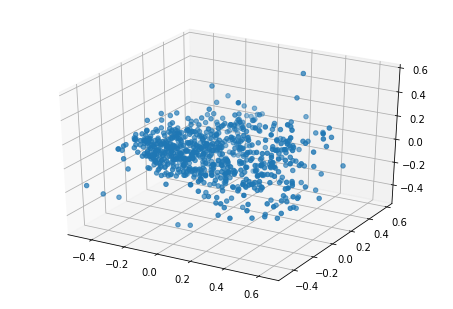

In [363]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X3D[:,0],X3D[:,1], X3D[:,2])
plt.show()

In [364]:
clfNaive.fit(X_train,Y_train)
predictions = clfNaive.predict(X_test)
accuracy = accuracy_score(y_true=Y_test,y_pred=predictions)
f1 = f1_score(y_true=Y_test,y_pred=predictions)
print('Accuracy score of the classifier is:',"{:.{}f}".format( accuracy,3))
print('F1 score of the classifier is:',"{:.{}f}".format( f1,3))



Accuracy score of the classifier is: 0.770
F1 score of the classifier is: 0.598


In [365]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clfNeighbour,neighbourParams,scoring='f1').fit(X_train,Y_train)
pred = grid.predict(X_test)
accuracy = accuracy_score(y_true=Y_test,y_pred=pred)
f1 = f1_score(y_true=Y_test,y_pred=pred)
print('Best parameters to maximize F1 score are:',grid.best_params_)
print('Accuracy score of the classifier is:',"{:.{}f}".format(accuracy,3))
print('F1 score of the classifier is:',"{:.{}f}".format(f1,3))


Best parameters to maximize F1 score are: {'leaf_size': 5, 'n_neighbors': 15, 'weights': 'distance'}
Accuracy score of the classifier is: 0.730
F1 score of the classifier is: 0.529


In [366]:
grid = GridSearchCV(clflogistic,param_grid=logisticParams,scoring='f1').fit(X_train,Y_train)
pred = grid.predict(X_test)
accuracy = accuracy_score(y_true=Y_test,y_pred=pred)
f1 = f1_score(y_true=Y_test,y_pred=pred)
print('Best parameters to maximize F1 score are:',grid.best_params_)
print('Accuracy score of the classifier is:',"{:.{}f}".format(accuracy,3))
print('F1 score of the classifier is:',"{:.{}f}".format(f1,3))

Best parameters to maximize F1 score are: {'C': 8.1, 'penalty': 'l2'}
Accuracy score of the classifier is: 0.796
F1 score of the classifier is: 0.652


In [367]:
grid = GridSearchCV(clfNetwork,param_grid=networkParams,scoring='f1').fit(X_train,Y_train)
pred = grid.predict(X_test)
accuracy = accuracy_score(y_true=Y_test,y_pred=pred)
f1 = f1_score(y_true=Y_test,y_pred=pred)
print('Best parameters to maximize F1 score are:',grid.best_params_)
print('Accuracy score of the classifier is:',"{:.{}f}".format(accuracy,3))
print('F1 score of the classifier is:',"{:.{}f}".format(f1,3))

Best parameters to maximize F1 score are: {'alpha': 0.001, 'learning_rate': 'invscaling', 'max_iter': 400}
Accuracy score of the classifier is: 0.789
F1 score of the classifier is: 0.610


In [368]:
grid = GridSearchCV(clfTree,param_grid=treeParams,scoring='f1').fit(X_train,Y_train)
pred = grid.predict(X_test)
accuracy = accuracy_score(y_true=Y_test,y_pred=pred)
f1 = f1_score(y_true=Y_test,y_pred=pred)
print('Best parameters to maximize F1 score are:',grid.best_params_)
print('Accuracy score of the classifier is:',"{:.{}f}".format(accuracy,3))
print('F1 score of the classifier is:',"{:.{}f}".format(f1,3))

Best parameters to maximize F1 score are: {'criterion': 'gini'}
Accuracy score of the classifier is: 0.684
F1 score of the classifier is: 0.538


In [372]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn




In [371]:
grid = GridSearchCV(clfSVC,param_grid=SVMparams,scoring='f1').fit(X_train,Y_train)
pred = grid.predict(X_test)
accuracy = accuracy_score(y_true=Y_test,y_pred=pred)
f1 = f1_score(y_true=Y_test,y_pred=pred)
print('Best parameters to maximize F1 score are:',grid.best_params_)
print('Accuracy score of the classifier is:',"{:.{}f}".format(accuracy,3))
print('F1 score of the classifier is:',"{:.{}f}".format(f1,3))


Best parameters to maximize F1 score are: {'C': 27, 'degree': 2, 'kernel': 'rbf', 'probability': True}
Accuracy score of the classifier is: 0.783
F1 score of the classifier is: 0.612
